# Исследование продаж компьютерных игр интернет-магазина «Стримчик»

В проекте проводится исследование продаж комьютерных игр интернет-магазина «Стримчик» на основе данных до 2016 г. из открытых источников с целью выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

План анализа данных:
1) Изучить общую информацию о данных.

2) Проанализировать пропущенные значения, по возможности заполнить.

3) Удалить дубликаты.

4) При необходимости добавить новые столбцы для удобства проведения анализа.

5) Провести анализ данных:

    а) посмотреть, сколько игр выпускалось в разные годы,
    б) посмотреть, как менялись продажи по платформам,
    в) определить актуальный период анализа,
    г) определить, какие платформы лидируют по продажам,
    д) посмотреть, как влияют на продажи внутри каждой платформы отзывы пользователей и критиков,
    е) посмотреть на общее распределение игр по жанрам,
    ж) определить для пользователя каждого региона самые популярные платформы (топ-5), самые популярные жанры (топ-5),
    з) определить, влияет ли рейтинг ESRB на продажи в отдельном регионе.

6) Сделать общий вывод.

### Общая информация

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv', sep=',')

Посмотрим на общую информацию о данных:

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В датасете есть пропущенные значения.

Посмотрим на первые 10 строк датасета:

In [3]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Типы данных некоторых столбцов не соответствуют содержимому.

### Подготовка данных

Приведём названия столбцов к нижнему регистру:

In [4]:
data = data.rename(
    columns={
        'Name': 'name',
        'Platform': 'platform',
        'Year_of_Release': 'year_of_release',
        'Genre': 'genre',
        'NA_sales': 'na_sales',
        'EU_sales': 'eu_sales',
        'JP_sales': 'jp_sales',
        'Other_sales': 'other_sales',
        'Critic_Score': 'critic_score',
        'User_Score': 'user_score',
        'Rating': 'rating'
    }
)

Убедимся, что названия столбцов изменились:

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


---

Преобразуем типы данных в некоторых столбцах на подходящие:

In [6]:
# Преобразуем тип year_of_release, потому что это целое число:
data['year_of_release'] = data['year_of_release'].convert_dtypes()

# Тип user_score преобразуем после того, как избавимся от значения 'tbd'

Убедимся, что тип данных изменился:

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(5), object(5)
memory usage: 1.4+ MB


Изменение типов данных необходимо проводить для удобства работы с данными.

---

Заполним пропуски в данных:

In [8]:
# Год выпуска заполним медианным значением как наиболее подходящим для данного столбца
data.loc[data['year_of_release'].isna(), 'year_of_release'] = data['year_of_release'].median()

# Значение 'tbd' (to be determined) в столбце user_score заменим на None
data.loc[data['user_score'] == 'tbd', 'user_score'] = None

Пропущенные значения name и genre заполнять не будем, потому что непонятно, чем заполнить эти пропуски, к тому же в датасете всего 2 таких строки. Пропущенные значения critic_score, user_score, rating также не будем заполнять, т.к. таких значений много (около половины), заполнение пропусков может сильно исказить картину.

Пропуски в данных могли появиться из-за того, что в открытые источники данные могут вноситься без достаточной валидации, а также из-за того, что при выгрузке данных из открытых источников могла произойти ошибка. В столбце `user_score` присутствует значение 'tbd', т.к. не для всех игр определена оценка пользователей.

---

Теперь можем изменить тип user_score:

In [9]:
data['user_score'] = data['user_score'].astype(float)

Убедимся, что тип user_score изменился:

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


---

Посмотрим на число строк-дубликатов:

In [11]:
data.duplicated().sum()

0

Строки-дубликаты отсутствуют.

Посмотрим на уникальные значения в столбце `name`:

In [12]:
pd.set_option('display.max_rows', None)

In [13]:
data['name'].value_counts(dropna=False).sort_index()

 Beyblade Burst                                                                                                                          1
 Fire Emblem Fates                                                                                                                       1
 Frozen: Olaf's Quest                                                                                                                    2
 Haikyu!! Cross Team Match!                                                                                                              1
 Tales of Xillia 2                                                                                                                       1
'98 Koshien                                                                                                                              1
.hack//G.U. Vol.1//Rebirth                                                                                                               1
.hack//G.U. Vol.2//Reminisc

В столбце `name` не обнаружено неявных дубликатов.

Проведём аналогичную проверку для столбца `platform`:

In [14]:
data['platform'].value_counts(dropna=False).sort_index()

2600     133
3DO        3
3DS      520
DC        52
DS      2151
GB        98
GBA      822
GC       556
GEN       29
GG         1
N64      319
NES       98
NG        12
PC       974
PCFX       1
PS      1197
PS2     2161
PS3     1331
PS4      392
PSP     1209
PSV      430
SAT      173
SCD        6
SNES     239
TG16       2
WS         6
Wii     1320
WiiU     147
X360    1262
XB       824
XOne     247
Name: platform, dtype: int64

В столбце `platform` не обнаружено неявных дубликатов.

Проведём аналогичную проверку для столбца `genre`:

In [15]:
data['genre'].value_counts(dropna=False).sort_index()

Action          3369
Adventure       1303
Fighting         849
Misc            1750
Platform         888
Puzzle           580
Racing          1249
Role-Playing    1498
Shooter         1323
Simulation       873
Sports          2348
Strategy         683
NaN                2
Name: genre, dtype: int64

В столбце `genre` не обнаружено неявных дубликатов.

Проведём аналогичную проверку для столбца `rating`:

In [16]:
data['rating'].value_counts(dropna=False).sort_index()

AO         1
E       3990
E10+    1420
EC         8
K-A        3
M       1563
RP         3
T       2961
NaN     6766
Name: rating, dtype: int64

В столбце `rating` не обнаружено неявных дубликатов.

In [17]:
pd.set_option('display.max_rows', 10)

---

Посчитаем суммарные продажи во всех регионах:

In [18]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31


### Исследовательский анализ данных

Посмотрим, сколько игр выпускалось в разные годы:

<AxesSubplot:title={'center':'Число выпусков игр по годам'}, xlabel='Год выпуска', ylabel='Число игр'>

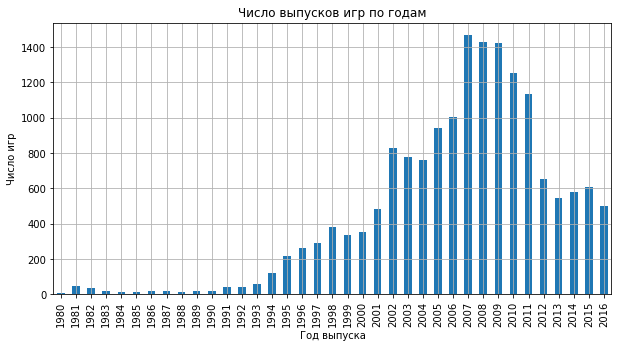

In [19]:
summary = data.groupby(by='year_of_release')['name'].count().sort_index()
summary.plot(x='Год выпуска', kind='bar', figsize=(10, 5), title='Число выпусков игр по годам', grid=True, xlabel='Год выпуска', ylabel='Число игр')

Больше всего игр выпускалось в период 2007-2009 гг. Значения до 1995 г. можно не учитывать ввиду их малости.

---

Посмотрим на объём продаж игр по платформам:

<AxesSubplot:title={'center':'Объём суммарных продаж игр по платформам'}, xlabel='Название платформы', ylabel='Число проданных копий, млн'>

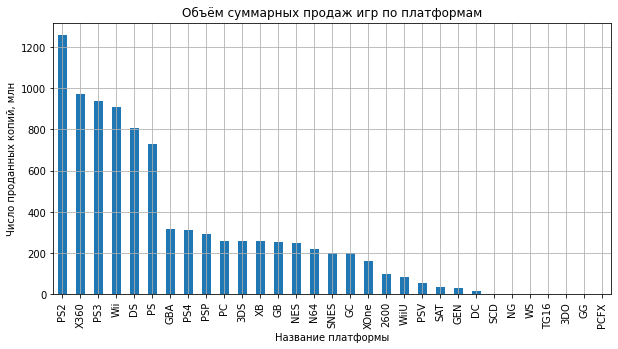

In [20]:
summary = data.groupby(by='platform')['total_sales'].sum().sort_values(ascending=False)
summary.plot(kind='bar', figsize=(10, 5), title='Объём суммарных продаж игр по платформам', grid=True, xlabel='Название платформы', ylabel='Число проданных копий, млн')

Построим распределение суммарных продаж по годам для платформ с наибольшими суммарными продажами:

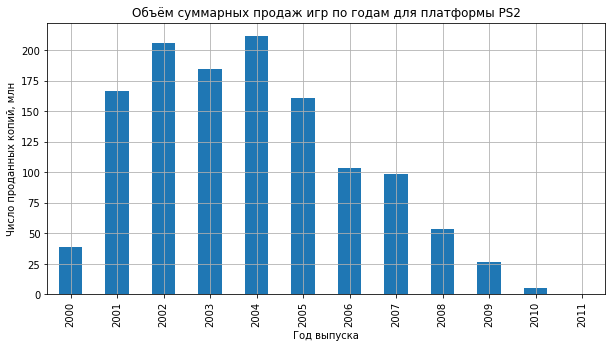

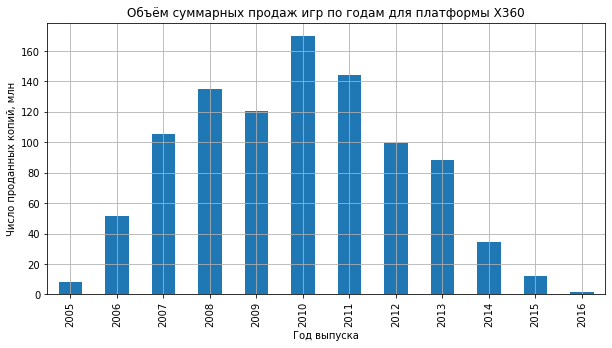

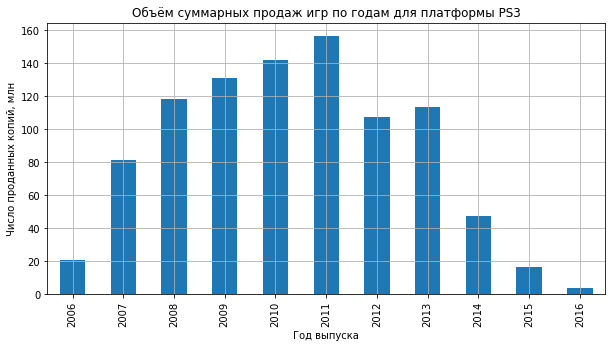

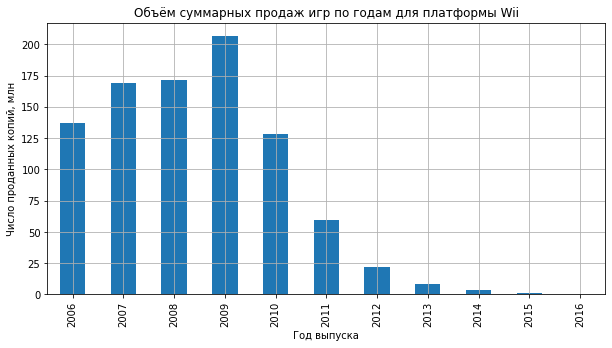

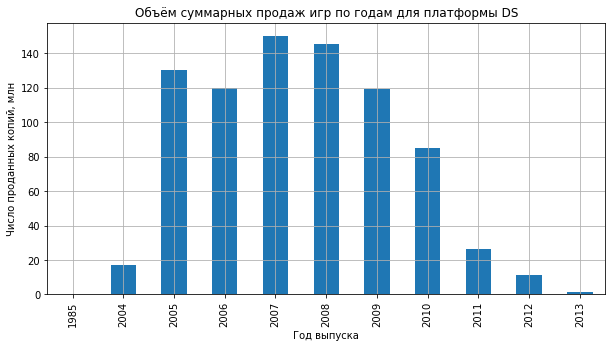

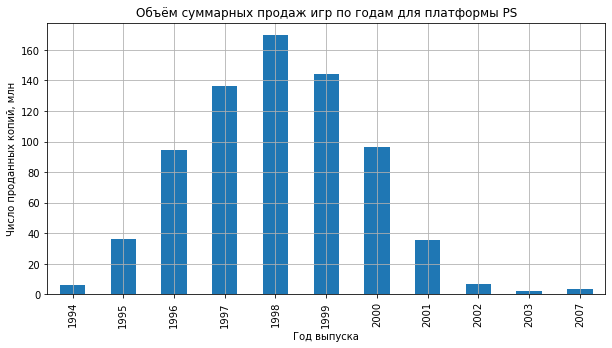

In [21]:
for i in range(6):
    platform = summary.index[i]
    total_sales_by_year = data[data['platform'] == platform].groupby(by='year_of_release')['total_sales'].sum()
    total_sales_by_year.plot(kind='bar', figsize=(10, 5), title=f'Объём суммарных продаж игр по годам для платформы {platform}', grid=True, xlabel='Год выпуска', ylabel='Число проданных копий, млн')
    plt.show()

Если принять за период жизни платформ период, когда продажи игр составляют не менее 20 млн копий в год, тогда характерный период жизни платформ - 8 лет.

---

Возьмём для дальнейшего анализа данные за период 3 года с 2014 по 2016 гг.:

In [22]:
data = data[data['year_of_release'] >= 2014]

---

Посмотрим на объём продаж игр по платформам после фильтрации по году выпуска:

<AxesSubplot:title={'center':'Объём суммарных продаж игр по платформам'}, xlabel='Название платформы', ylabel='Число проданных копий, млн'>

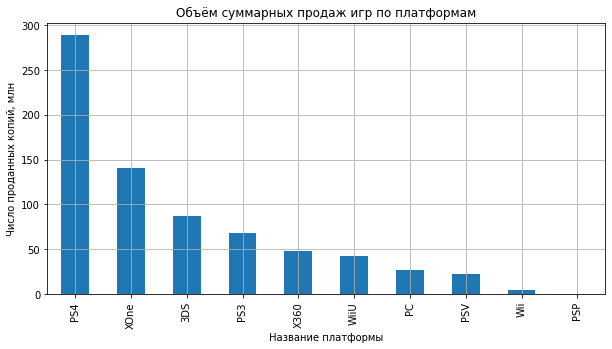

In [23]:
summary = data.groupby(by='platform')['total_sales'].sum().sort_values(ascending=False)
summary.plot(kind='bar', figsize=(10, 5), title='Объём суммарных продаж игр по платформам', grid=True, xlabel='Название платформы', ylabel='Число проданных копий, млн')

По продажам лидируют платформы PS4 и XOne. К потенциально прибыльным платформам можно отнести 3DS, PS3.

Посмотрим на динамику продаж для данных платформ:

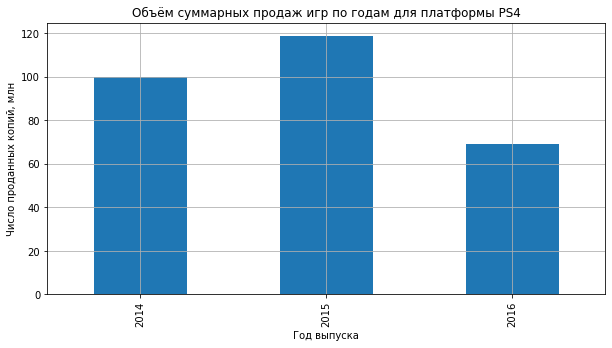

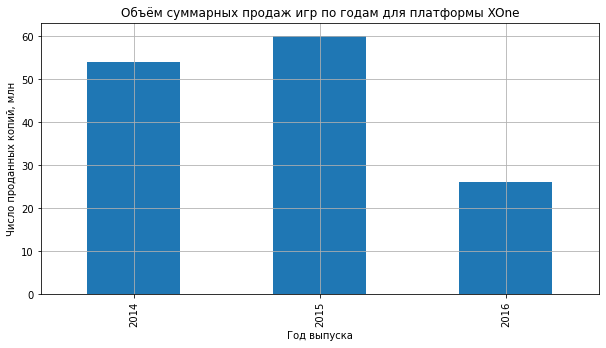

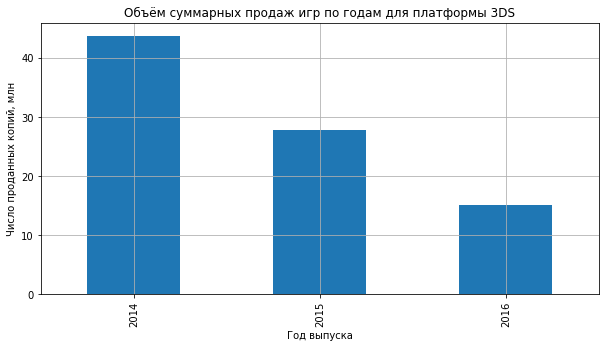

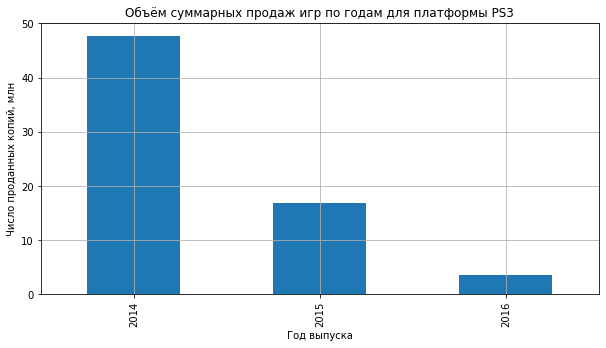

In [24]:
for i in range(4):
    platform = summary.index[i]
    total_sales_by_year = data[data['platform'] == platform].groupby(by='year_of_release')['total_sales'].sum()
    total_sales_by_year.plot(kind='bar', figsize=(10, 5), title=f'Объём суммарных продаж игр по годам для платформы {platform}', grid=True, xlabel='Год выпуска', ylabel='Число проданных копий, млн')
    plt.show()

Продажи для данных платформ сильно упали в рассматриваемый актуальный период.

---

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам:

<AxesSubplot:title={'center':'total_sales'}, xlabel='platform'>

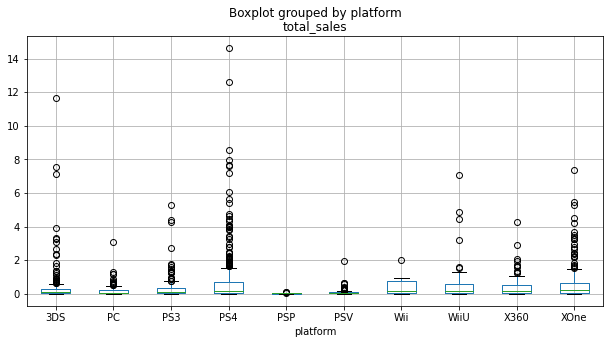

In [25]:
data.boxplot(column='total_sales', by='platform', figsize=(10, 5))

Для подавляющего большинства платформ существует много игр, объём продаж которых сильно превышает средние показатели для данных платформ. Это значит, что есть популярные игры, которые продаются значительно лучше остального большинства.

---

Посмотрим, как влияют на продажи внутри платформы PS4 отзывы пользователей и критиков.

Построим диаграмму рассеяния и посчитаем корреляцию между отзывами пользователей и продажами:

<AxesSubplot:title={'center':'PS4'}, xlabel='Оценка пользователей', ylabel='Число проданных копий, млн'>

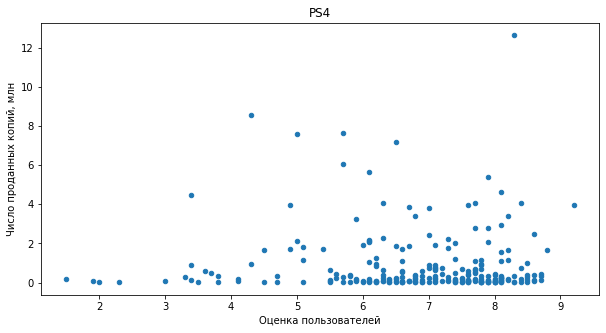

In [26]:
platform = 'PS4'
sample = data[data['platform'] == platform]
sample.plot.scatter('user_score', 'total_sales', figsize=(10, 5), title=platform, xlabel='Оценка пользователей', ylabel='Число проданных копий, млн')

In [27]:
sample['user_score'].corr(sample['total_sales'])

-0.040131589472697356

Между отзывами пользователей и продажами связь не прослеживается.

Построим диаграмму рассеяния и посчитаем корреляцию между отзывами критиков и продажами:

<AxesSubplot:title={'center':'PS4'}, xlabel='Оценка критиков', ylabel='Число проданных копий, млн'>

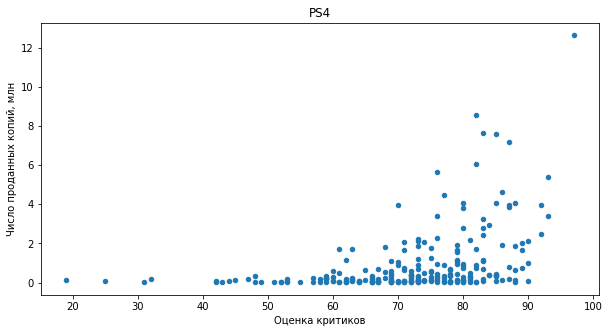

In [28]:
sample.plot.scatter('critic_score', 'total_sales', figsize=(10, 5), title=platform, xlabel='Оценка критиков', ylabel='Число проданных копий, млн')

In [29]:
sample['critic_score'].corr(sample['total_sales'])

0.40266141068104083

Между отзывами критиков и продажами наблюдается намного более сильная связь по сравнению со связью между отзывами пользователей и продажами.

---

Построим аналогичные графики для других платформ:

In [30]:
platforms = data['platform'].unique()

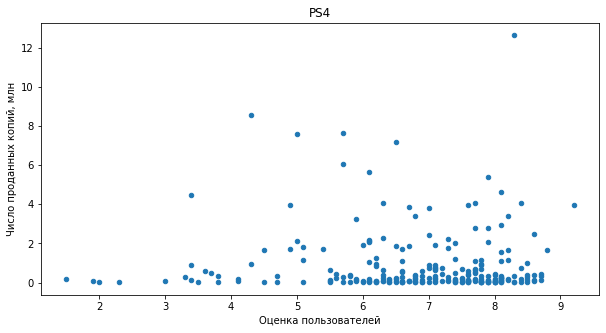

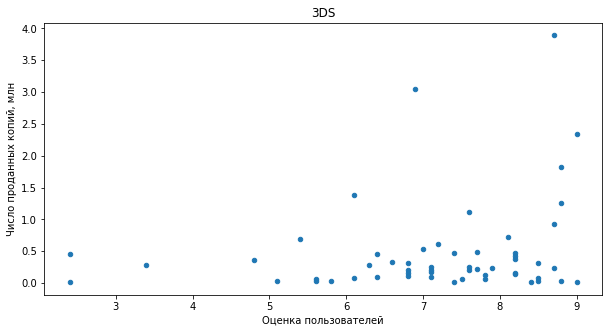

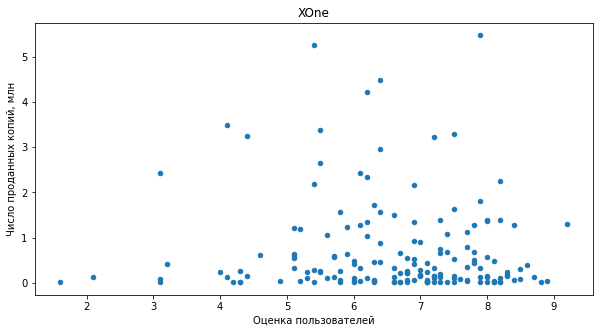

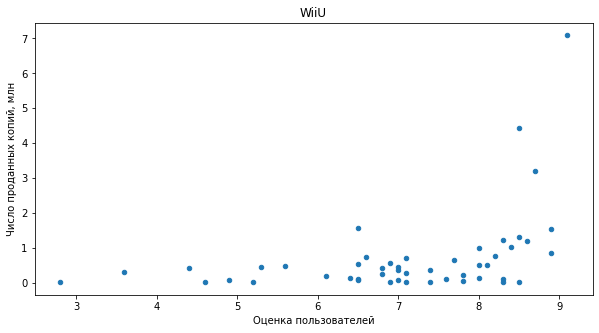

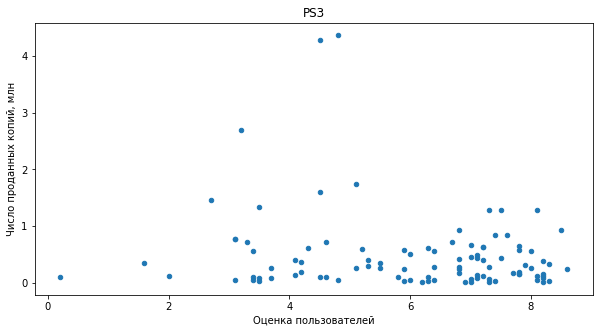

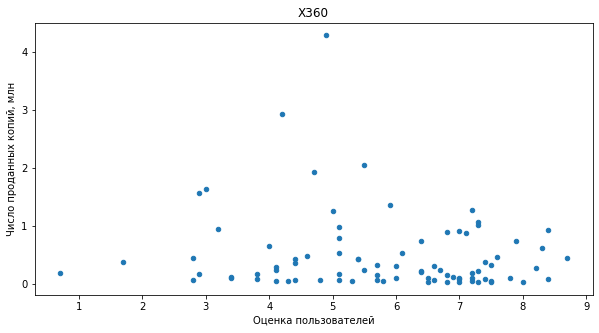

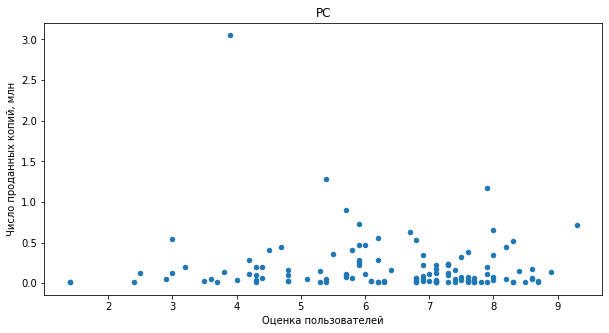

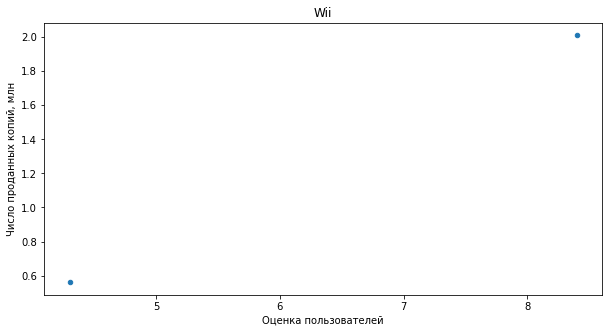

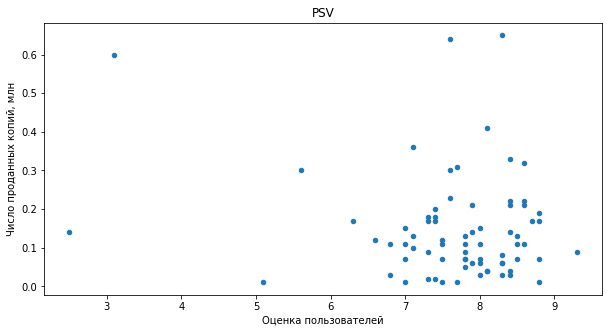

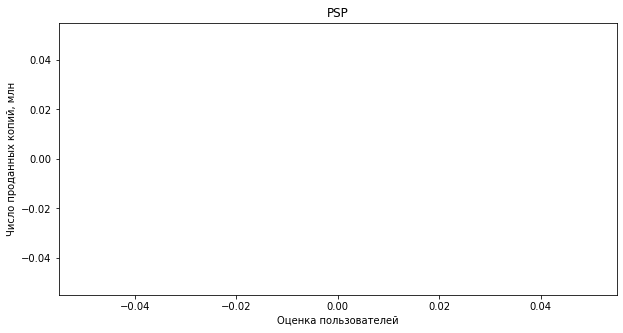

In [31]:
# Связь между отзывами пользователей и продажами
for platform in platforms:
    sample = data[data['platform'] == platform]
    sample.plot.scatter('user_score', 'total_sales', figsize=(10, 5), title=platform, xlabel='Оценка пользователей', ylabel='Число проданных копий, млн')

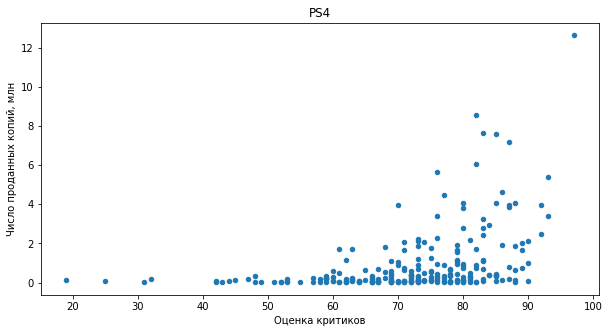

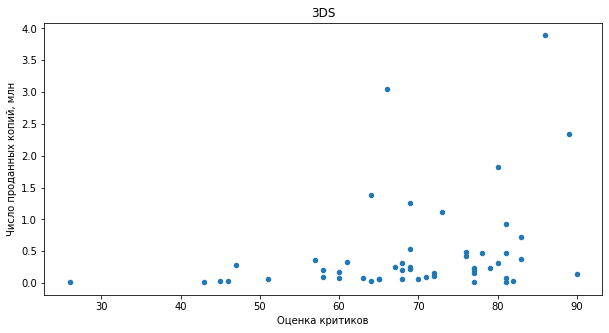

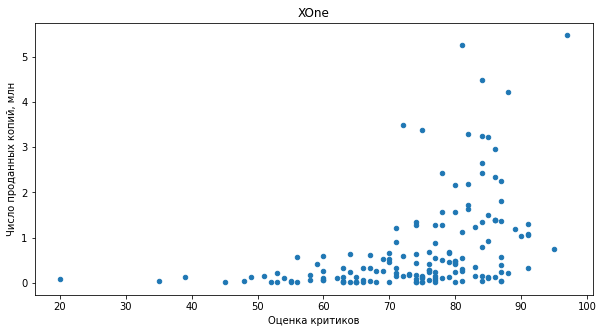

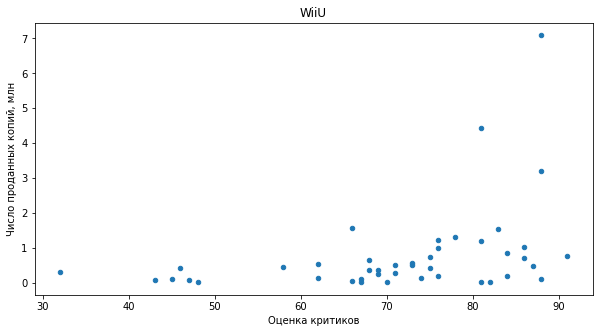

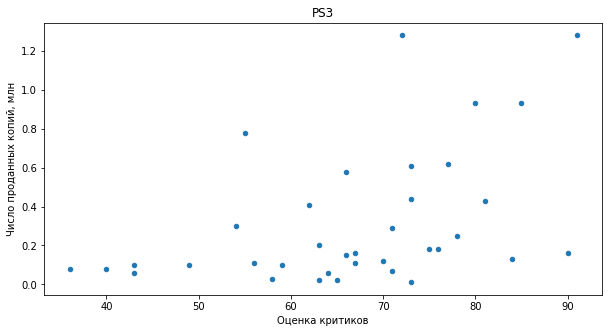

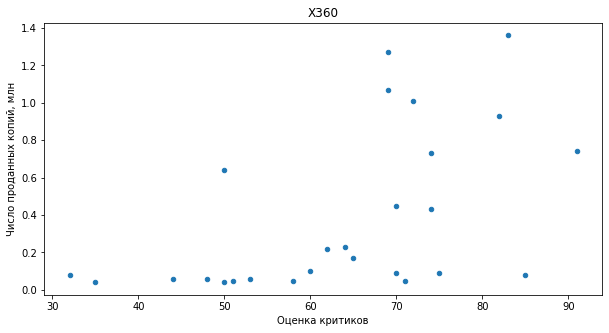

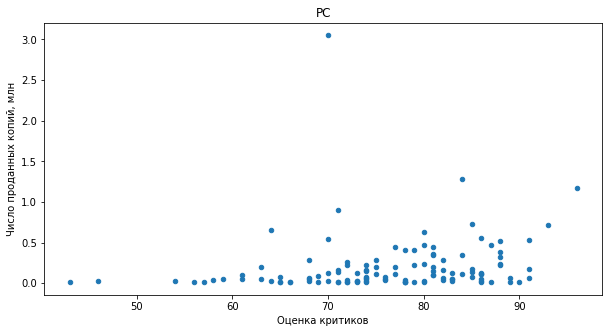

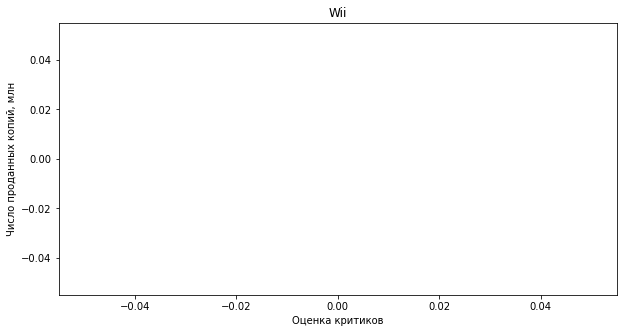

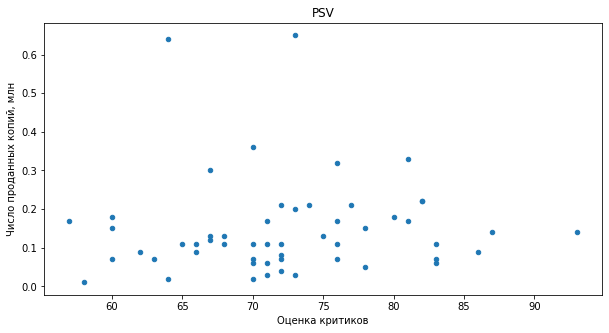

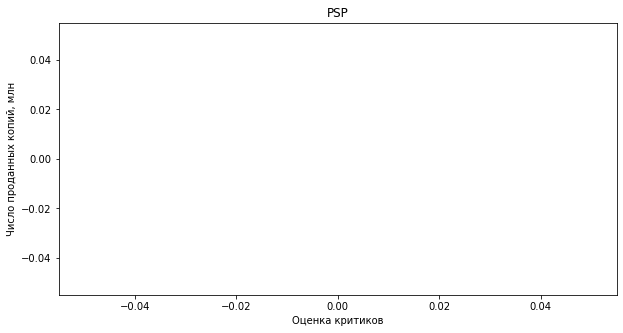

In [32]:
# Связь между отзывами критиков и продажами
for platform in platforms:
    sample = data[data['platform'] == platform]
    sample.plot.scatter('critic_score', 'total_sales', figsize=(10, 5), title=platform, xlabel='Оценка критиков', ylabel='Число проданных копий, млн')

Составим таблицу с коэффициентами корреляции между отзывами пользователей и критиков и продажами для всех платформ:

In [33]:
pd.set_option('display.max_rows', None)

In [34]:
user_score_corr_coef = pd.Series(dtype=float)
critic_score_corr_coef = pd.Series(dtype=float)

for platform in platforms:
    sample = data[data['platform'] == platform]
    corr_coef = sample['user_score'].corr(sample['total_sales'])
    user_score_corr_coef = user_score_corr_coef.append(pd.Series({platform: corr_coef}))
    corr_coef = sample['critic_score'].corr(sample['total_sales'])
    critic_score_corr_coef = critic_score_corr_coef.append(pd.Series({platform: corr_coef}))

score_corr_coef = pd.DataFrame(
    {
        'user_score_corr_coef': user_score_corr_coef,
        'critic_score_corr_coef': critic_score_corr_coef
    }
)

score_corr_coef

,user_score_corr_coef,critic_score_corr_coef
PS4,-0.040132,0.402661
3DS,0.215193,0.314117
XOne,-0.070384,0.428677
WiiU,0.407926,0.370201
PS3,-0.166761,0.446575
X360,-0.138445,0.525723
PC,-0.071597,0.174634
Wii,1.000000,NaN
PSV,-0.168455,0.042665
PSP,NaN,NaN


Мы видим, что практически для всех платформ отзывы критиков имеют большее влияние на продажи, чем отзывы пользователей. Исключением являются платформы WiiU и PSV, но для платформы WiiU разница в коэффициентах корреляции незначительна. По некоторым платформам недостаточно данных для анализа.

In [35]:
pd.set_option('display.max_rows', 10)

---

Посмотрим на распределение числа проданных игр по жанрам:

<AxesSubplot:title={'center':'Число проданных игр по жанрам'}, xlabel='Жанр', ylabel='Число проданных игр по жанрам'>

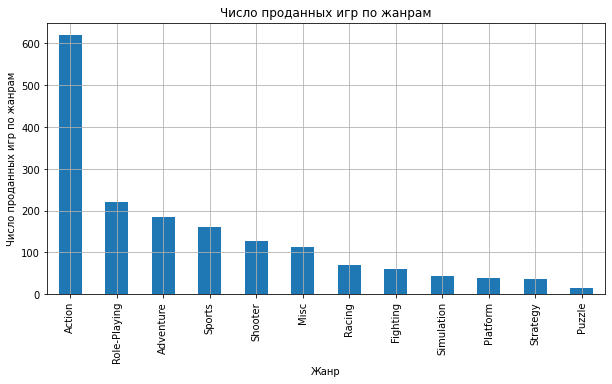

In [36]:
summary = data.groupby(by='genre')['name'].count().sort_values(ascending=False)
summary.plot(kind='bar', figsize=(10, 5), title='Число проданных игр по жанрам', grid=True, xlabel='Жанр', ylabel='Число проданных игр по жанрам')

Самым популярным жанром является жанр Action.

Посмотрим на распределение продаж игр по жанрам:

<AxesSubplot:title={'center':'Продажи игр по жанрам'}, xlabel='Жанр', ylabel='Число проданных копий, млн'>

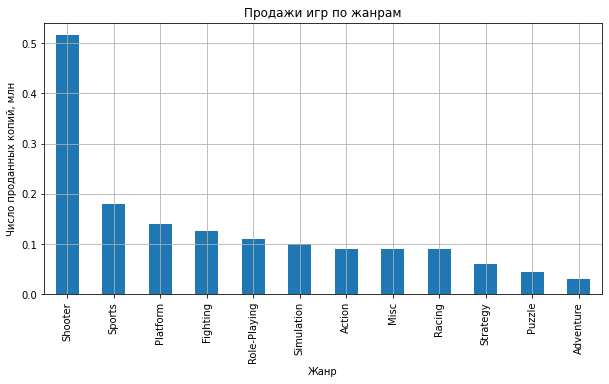

In [37]:
summary = data.groupby(by='genre')['total_sales'].median().sort_values(ascending=False)
summary.plot(kind='bar', figsize=(10, 5), title='Продажи игр по жанрам', grid=True, xlabel='Жанр', ylabel='Число проданных копий, млн')

Самые прибыльные жанры: Shooter, Sports, Platform, Fighting, Role-Playing. Выделяется жанр с высокими продажами (Shooter). Жанр с низкими продажами (Adventure) сильно не выделяется.

### Портрет пользователя каждого региона

In [38]:
total_summary = data.groupby(by='platform')['total_sales'].sum()

Посмотрим на доли продаж игр по платформам от общемировых в регионе NA:

<AxesSubplot:title={'center':'Доли продаж игр по платформам от общемировых в регионе NA'}, xlabel='Платформа', ylabel='Доля, %'>

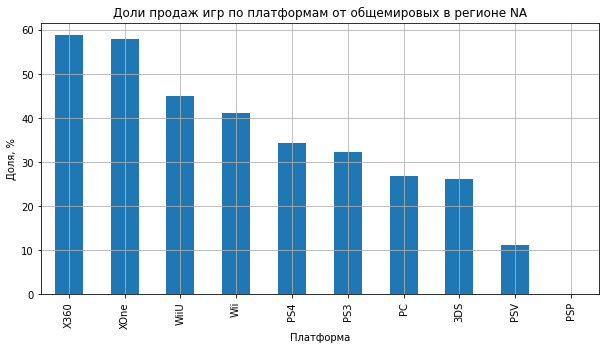

In [39]:
na_summary = data.groupby(by='platform')['na_sales'].sum()
share_of_na_sales = (na_summary / total_summary * 100).sort_values(ascending=False)
share_of_na_sales.plot(kind='bar', figsize=(10, 5), title='Доли продаж игр по платформам от общемировых в регионе NA', grid=True, xlabel='Платформа', ylabel='Доля, %')

Самые популярные платформы в регионе NA по долям продаж: X360, XOne, WiiU, Wii, PS4.

Посмотрим на доли продаж игр по платформам от общемировых в регионе EU:

<AxesSubplot:title={'center':'Доли продаж игр по платформам от общемировых в регионе EU'}, xlabel='Платформа', ylabel='Доля, %'>

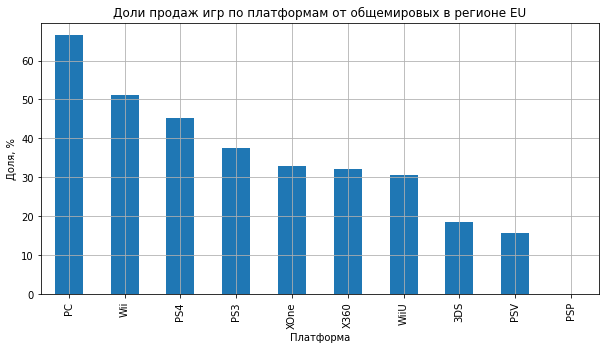

In [40]:
eu_summary = data.groupby(by='platform')['eu_sales'].sum()
share_of_eu_sales = (eu_summary / total_summary * 100).sort_values(ascending=False)
share_of_eu_sales.plot(kind='bar', figsize=(10, 5), title='Доли продаж игр по платформам от общемировых в регионе EU', grid=True, xlabel='Платформа', ylabel='Доля, %')

Самые популярные платформы в регионе EU по долям продаж: PC, Wii, PS4, PS3, XOne.

Посмотрим на доли продаж игр по платформам от общемировых в регионе JP:

<AxesSubplot:title={'center':'Доли продаж игр по платформам от общемировых в регионе JP'}, xlabel='Платформа', ylabel='Доля, %'>

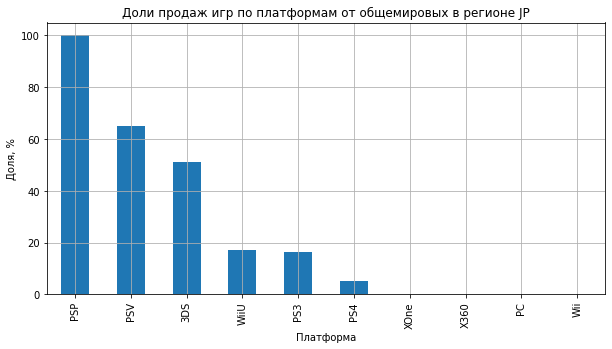

In [41]:
jp_summary = data.groupby(by='platform')['jp_sales'].sum()
share_of_jp_sales = (jp_summary / total_summary * 100).sort_values(ascending=False)
share_of_jp_sales.plot(kind='bar', figsize=(10, 5), title='Доли продаж игр по платформам от общемировых в регионе JP', grid=True, xlabel='Платформа', ylabel='Доля, %')

Самые популярные платформы в регионе JP по долям продаж: PSP, PSV, 3DS, WiiU, PS3.

Самый большой разброс в долях продаж по платформам наблюдается для региона JP.

---

Проведём аналогичный анализ для жанров.

In [42]:
total_summary = data.groupby(by='genre')['total_sales'].sum()

Посмотрим на доли продаж игр по жанрам от общемировых в регионе NA:

<AxesSubplot:title={'center':'Доли продаж игр по жанрам от общемировых в регионе NA'}, xlabel='Жанр', ylabel='Доля, %'>

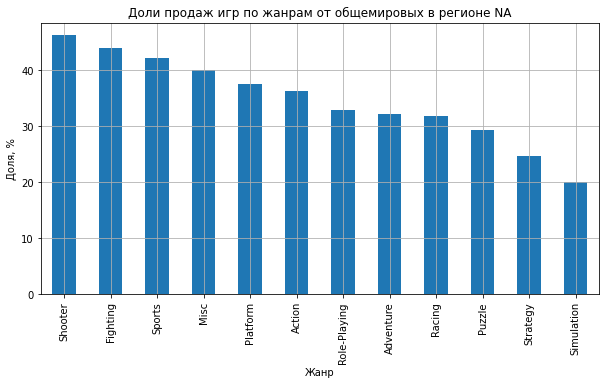

In [43]:
na_summary = data.groupby(by='genre')['na_sales'].sum()
share_of_na_sales = (na_summary / total_summary * 100).sort_values(ascending=False)
share_of_na_sales.plot(kind='bar', figsize=(10, 5), title='Доли продаж игр по жанрам от общемировых в регионе NA', grid=True, xlabel='Жанр', ylabel='Доля, %')

Самые популярные жанры в регионе NA по долям продаж: Shooter, Fighting, Sports, Misc, Platform.

Посмотрим на доли продаж игр по жанрам от общемировых в регионе EU:

<AxesSubplot:title={'center':'Доли продаж игр по жанрам от общемировых в регионе EU'}, xlabel='Жанр', ylabel='Доля, %'>

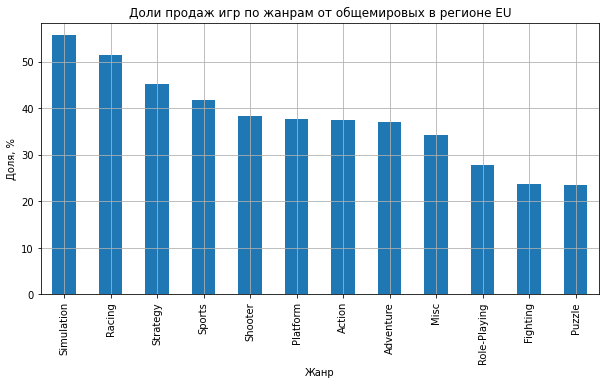

In [44]:
eu_summary = data.groupby(by='genre')['eu_sales'].sum()
share_of_eu_sales = (eu_summary / total_summary * 100).sort_values(ascending=False)
share_of_eu_sales.plot(kind='bar', figsize=(10, 5), title='Доли продаж игр по жанрам от общемировых в регионе EU', grid=True, xlabel='Жанр', ylabel='Доля, %')

Самые популярные жанры в регионе EU по долям продаж: Simulation, Racing, Strategy, Sports, Shooter.

Посмотрим на доли продаж игр по жанрам от общемировых в регионе JP:

<AxesSubplot:title={'center':'Доли продаж игр по жанрам от общемировых в регионе JP'}, xlabel='Жанр', ylabel='Доля, %'>

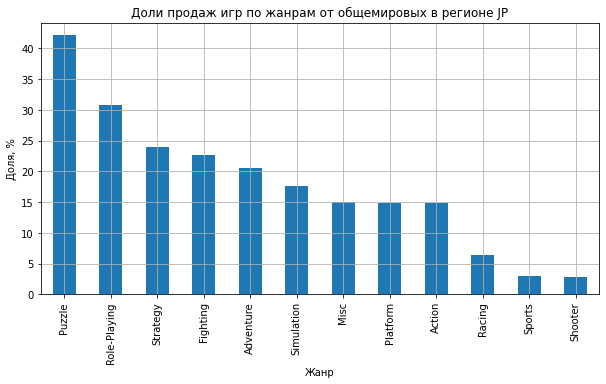

In [45]:
jp_summary = data.groupby(by='genre')['jp_sales'].sum()
share_of_jp_sales = (jp_summary / total_summary * 100).sort_values(ascending=False)
share_of_jp_sales.plot(kind='bar', figsize=(10, 5), title='Доли продаж игр по жанрам от общемировых в регионе JP', grid=True, xlabel='Жанр', ylabel='Доля, %')

Самые популярные жанры в регионе JP по долям продаж: Puzzle, Role-Playing, Strategy, Fighting, Adventure.

Самый большой разброс в долях продаж по жанрам наблюдается для региона JP. Мы видим, что в регионе JP пользователи больше выделяют определённые платформы и жанры, чем в других регионах. Самые популярные игры в регионе JP - это игры для платформы PSP жанра Puzzle, а самые непопулярные - игры для платформы Wii жанра Shooter.

---

Посмотрим, влияет ли рейтинг ESRB на продажи в отдельном регионе.

Посмотрим на объём продаж игр по рейтингу в регионе NA:

<AxesSubplot:title={'center':'Объём продаж игр по рейтингу в регионе NA'}, xlabel='Рейтинг', ylabel='Число проданных копий, млн'>

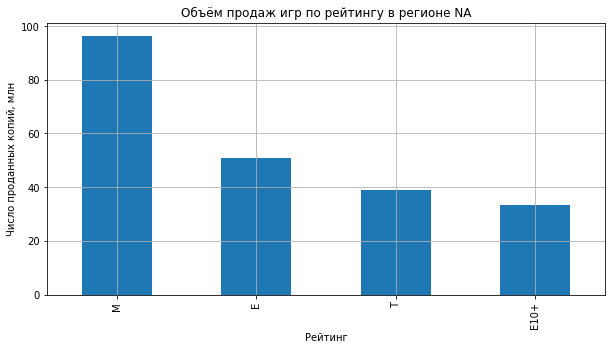

In [46]:
na_summary = data.groupby(by='rating')['na_sales'].sum().sort_values(ascending=False)
na_summary.plot(kind='bar', figsize=(10, 5), title='Объём продаж игр по рейтингу в регионе NA', grid=True, xlabel='Рейтинг', ylabel='Число проданных копий, млн')

Посмотрим на объём продаж игр по рейтингу в регионе EU:

<AxesSubplot:title={'center':'Объём продаж игр по рейтингу в регионе EU'}, xlabel='Рейтинг', ylabel='Число проданных копий, млн'>

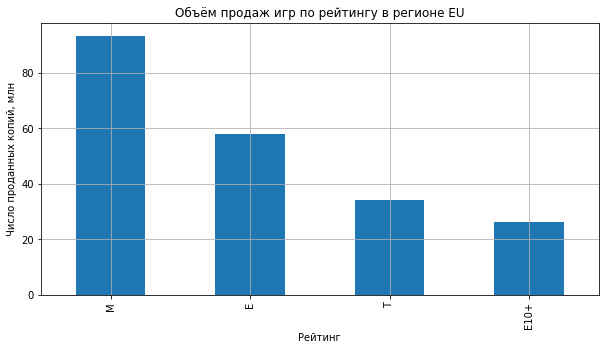

In [47]:
eu_summary = data.groupby(by='rating')['eu_sales'].sum().sort_values(ascending=False)
eu_summary.plot(kind='bar', figsize=(10, 5), title='Объём продаж игр по рейтингу в регионе EU', grid=True, xlabel='Рейтинг', ylabel='Число проданных копий, млн')

Посмотрим на объём продаж игр по рейтингу в регионе JP:

<AxesSubplot:title={'center':'Объём продаж игр по рейтингу в регионе JP'}, xlabel='Рейтинг', ylabel='Число проданных копий, млн'>

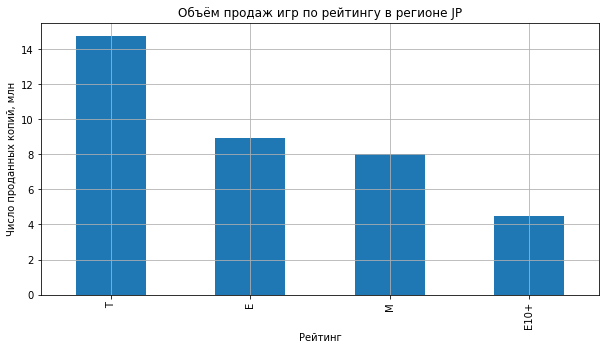

In [48]:
jp_summary = data.groupby(by='rating')['jp_sales'].sum().sort_values(ascending=False)
jp_summary.plot(kind='bar', figsize=(10, 5), title='Объём продаж игр по рейтингу в регионе JP', grid=True, xlabel='Рейтинг', ylabel='Число проданных копий, млн')

Объём продаж игр в отдельном регионе сильно зависит от рейтинга игр. Самый популярный рейтинг в регионах NA и EU - M, а в регионе JP - T.

### Общий вывод

В ходе работы проанализированы данные о продажах компьютерных игр интернет-магазина "Стримчик". Перед анализом проведена предобработка данных: изменены названия и преобразованы типы данных некоторых столбцов, заполнена часть пропусков, добавлен столбец с объёмом продаж во всех регионах.

Больше всего игр выпускалось в период 2007-2009 гг.

Если принять за период жизни платформ период, когда продажи игр составляют не менее 20 млн копий в год, тогда характерный период жизни платформ - 8 лет. Для анализа оставлены данные за актуальный период 2014-2016 гг.

По продажам лидируют платформы PS4 и XOne. К потенциально прибыльным платформам можно отнести 3DS, PS3. Продажи для данных платформ сильно упали в рассматриваемый актуальный период.

Для подавляющего большинства платформ существует много игр, объём продаж которых сильно превышает средние показатели для данных платформ. Это значит, что есть популярные игры, которые продаются значительно лучше остального большинства.

Для платформы PS4:
- между отзывами пользователей и продажами связь не прослеживается,
- между отзывами критиков и продажами наблюдается намного более сильная связь по сравнению со связью между отзывами пользователей и продажами.

Мы видим, что практически для всех платформ отзывы критиков имеют большее влияние на продажи, чем отзывы пользователей. Исключением являются платформы WiiU и PSV, но для платформы WiiU разница в коэффициентах корреляции незначительна.

Самым популярным жанром является жанр Action.

Самые прибыльные жанры: Shooter, Sports, Platform, Fighting, Role-Playing. Выделяется жанр с высокими продажами (Shooter). Жанр с низкими продажами (Adventure) сильно не выделяется.

Самые популярные платформы в регионе NA по долям продаж: X360, XOne, WiiU, Wii, PS4.

Самые популярные платформы в регионе EU по долям продаж: PC, Wii, PS4, PS3, XOne.

Самые популярные платформы в регионе JP по долям продаж: PSP, PSV, 3DS, WiiU, PS3.

Самый большой разброс в долях продаж по платформам наблюдается для региона JP.

Самые популярные жанры в регионе NA по долям продаж: Shooter, Fighting, Sports, Misc, Platform.

Самые популярные жанры в регионе EU по долям продаж: Simulation, Racing, Strategy, Sports, Shooter.

Самые популярные жанры в регионе JP по долям продаж: Puzzle, Role-Playing, Strategy, Fighting, Adventure.

Самый большой разброс в долях продаж по жанрам наблюдается для региона JP. Мы видим, что в регионе JP пользователи больше выделяют определённые платформы и жанры, чем в других регионах. Самые популярные игры в регионе JP - это игры для платформы PSP жанра Puzzle, а самые непопулярные - игры для платформы Wii жанра Shooter.

Объём продаж игр в отдельном регионе сильно зависит от рейтинга игр. Самый популярный рейтинг в регионах NA и EU - M, а в регионе JP - T.